In [1]:
#Instalar Paquetes
import tensorflow as tf


import numpy as np
import pandas as pd
import datetime
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Descargamos los datos

df= pdr.get_data_yahoo('AAPL', start= datetime.datetime(2019,1,1), end = datetime.datetime(2019,12,31))
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870


In [3]:
df.describe

<bound method NDFrame.describe of                   High         Low  ...      Volume   Adj Close
Date                                ...                        
2019-01-02  158.850006  154.229996  ...  37039700.0  155.214005
2019-01-03  145.720001  142.000000  ...  91312200.0  139.753540
2019-01-04  148.550003  143.800003  ...  58607100.0  145.719513
2019-01-07  148.830002  145.899994  ...  54777800.0  145.395203
2019-01-08  151.820007  148.520004  ...  41025300.0  148.166870
...                ...         ...  ...         ...         ...
2019-12-24  284.890015  282.920013  ...  12119700.0  283.596924
2019-12-26  289.980011  284.700012  ...  23280300.0  289.223602
2019-12-27  293.970001  288.119995  ...  36566500.0  289.113831
2019-12-30  292.690002  285.220001  ...  36028600.0  290.829773
2019-12-31  293.679993  289.519989  ...  25201400.0  292.954712

[252 rows x 6 columns]>

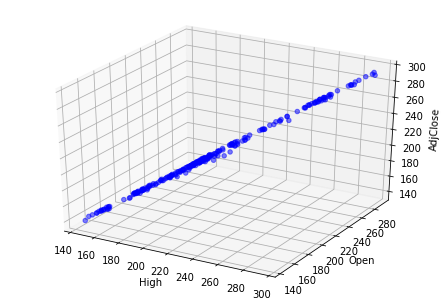

In [4]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['High'],df['Open'],df['Adj Close'],c='blue',marker='o',alpha=0.5)
ax.set_xlabel('High')
ax.set_ylabel('Open')
ax.set_zlabel('AdjClose')
plt.show()

In [5]:
#Normalizar los datos
mean = df.mean()
std =df.std()
df_norm= (df-mean) / std
df_norm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,-1.478352,-1.516995,-1.541273,-1.457367,0.832286,-1.461565
2019-01-03,-1.859092,-1.873495,-1.858668,-1.912794,5.846337,-1.901936
2019-01-04,-1.777028,-1.821026,-1.842668,-1.737051,2.824825,-1.732004
2019-01-07,-1.768909,-1.759812,-1.721354,-1.746605,2.471049,-1.741241
2019-01-08,-1.682205,-1.683439,-1.696334,-1.664958,1.200502,-1.662294


In [6]:
df_norm.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,1.779881e-16,-2.431917e-16,4.758099e-17,-5.339644e-16,1.564005e-17,4.053195e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.859092e+00,-1.873495e+00,-1.858668e+00,-1.912794e+00,-1.539988e+00,-1.901936e+00
25%,-6.379262e-01,-6.632745e-01,-6.616006e-01,-6.437931e-01,-6.518577e-01,-6.430955e-01
50%,-1.483726e-01,-1.363220e-01,-1.375791e-01,-1.517402e-01,-1.989510e-01,-1.488243e-01
75%,4.410054e-01,4.382902e-01,4.545907e-01,4.467140e-01,3.685219e-01,4.546292e-01
max,2.439816e+00,2.426660e+00,2.421944e+00,2.472396e+00,5.846337e+00,2.461797e+00


In [7]:
#Segmentamos los datos para las variables que queremos usar
feature_names=['High','Low','Open']
data_x= df_norm[feature_names]
data_y= df_norm['Adj Close']
print ('input_shape X_Data', data_x.shape)
print ('input_shape Y_Data', data_y.shape)

input_shape X_Data (252, 3)
input_shape Y_Data (252,)


In [0]:
#Separamos los datos
train_x , test_x ,train_Y, test_Y = train_test_split( data_x , data_y , test_size=0.2 )

In [0]:
#Preparamos los datos a tensorflow
train_x = tf.constant( train_x , dtype=tf.float32 )
train_Y = tf.constant( train_Y , dtype=tf.float32 )

test_X = tf.constant( test_x , dtype=tf.float32 ) 
test_Y = tf.constant( test_Y , dtype=tf.float32 ) 

In [0]:
#Definimos nuestras funciones y no sessiones para tf=2.00
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [0]:
#Parametros del entrenamiento
num_epochs = 10
num_samples = train_x.shape[0]
batch_size = 10
learning_rate = 0.01

In [0]:
#Preparamos los datos como un iterator para entrenarlo
dataset = tf.data.Dataset.from_tensor_slices(( train_x , train_Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [0]:
num_features = train_x.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0


In [0]:
epochs_plot = list()
loss_plot = list()

In [15]:
for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

Loss is 16.390628814697266
Loss is 11.3699951171875
Loss is 9.033456802368164
Loss is 7.558359622955322
Loss is 5.640229225158691
Loss is 4.578558444976807
Loss is 3.414339542388916
Loss is 2.90352725982666
Loss is 2.008080005645752
Loss is 1.4830597639083862


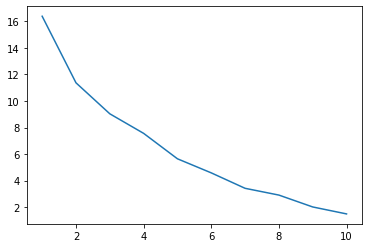

In [16]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [17]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 1.0623091459274292
